In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import FancyArrowPatch
import numpy as np
import IPython.display as ipd

from helpers_adaptivefilters import *
from helpers_miscellaneous import *

# Basic Tools

## Simulated Data

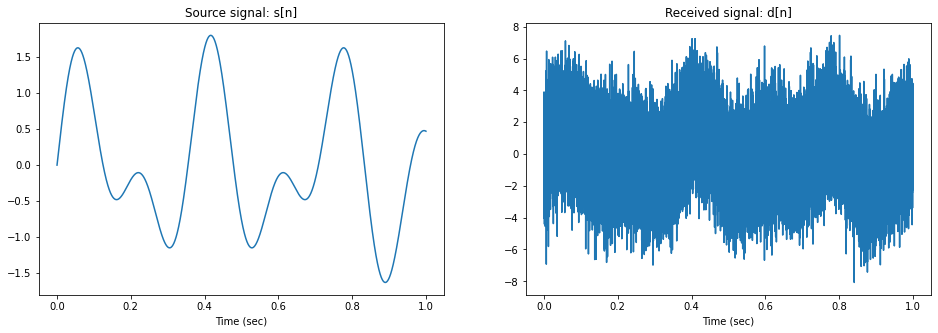

In [9]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))

### 1. LMS

Converged Point: 	 0.041405895691609976 sec
Max Misadjustment: 	 0.23768799841704855


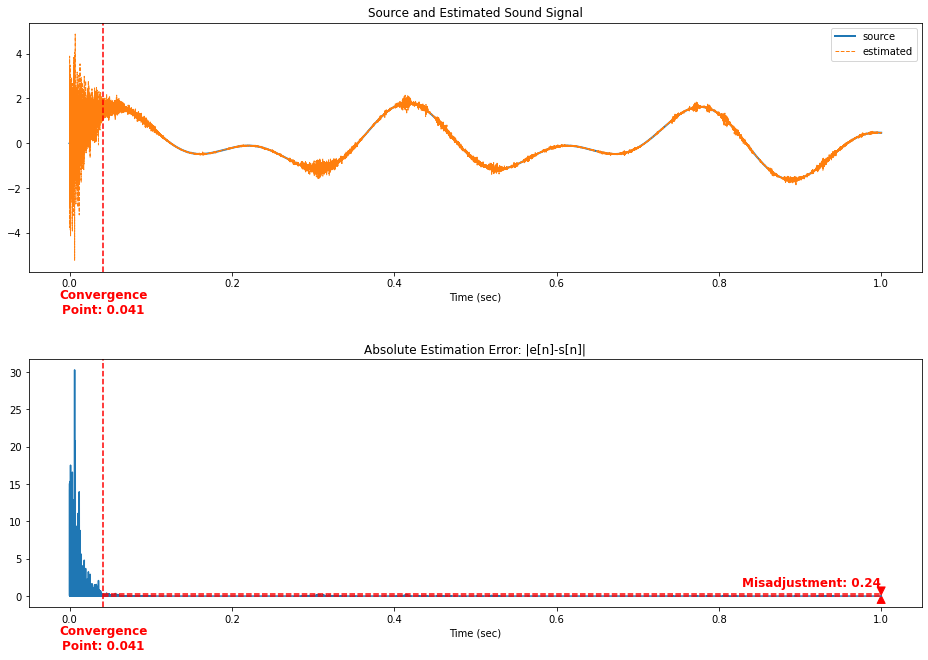

In [10]:
e = sb_lms(x, d, mu=0.001, K=5)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100, save=False, savedfname="../figures/StandardLMS")

Not Converged!
Converged Point: 	 0.02678004535147392 sec
Max Misadjustment: 	 0.34985635440381124
Converged Point: 	 0.026938775510204082 sec
Max Misadjustment: 	 2.2518936543267394
Converged Point: 	 0.01018140589569161 sec
Max Misadjustment: 	 18.503524201676303


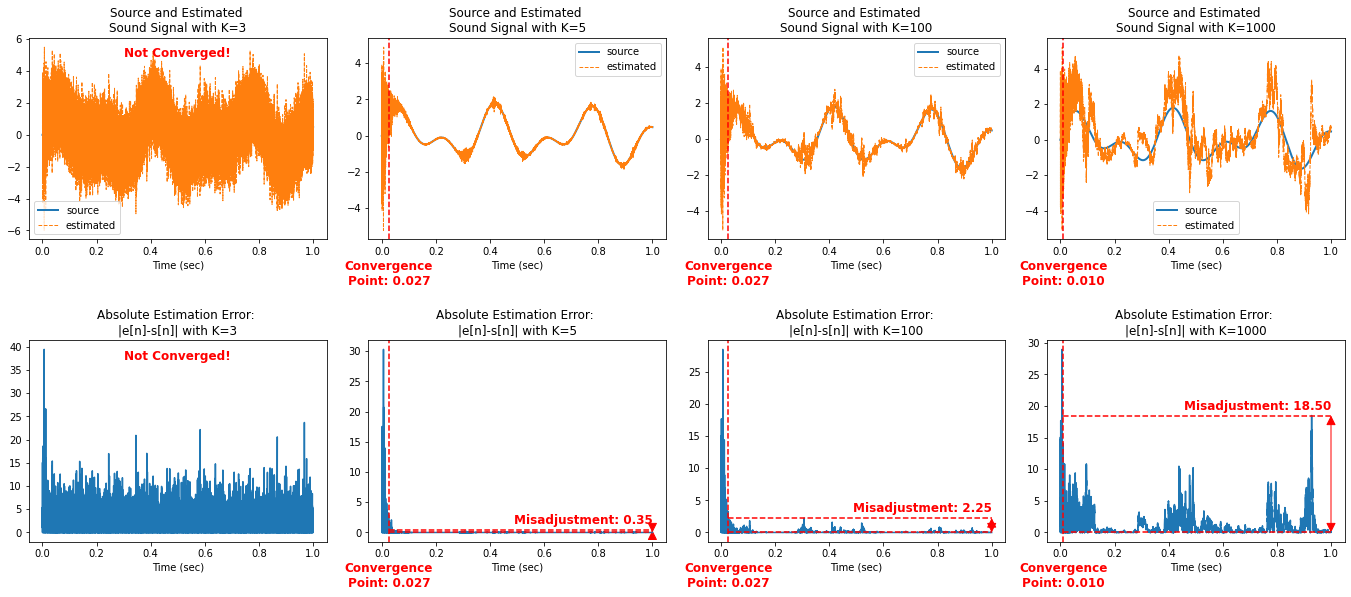

In [11]:
Ks = [3, 5, 100, 1000]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, Ks=Ks, conv_div=10, save=False, savedfname="../figures/StandardLMSvsKs")

Converged Point: 	 0.37317460317460316 sec
Max Misadjustment: 	 0.041479237578629265
Converged Point: 	 0.041405895691609976 sec
Max Misadjustment: 	 0.23768799841704855
Converged Point: 	 0.007142857142857143 sec
Max Misadjustment: 	 3.0395454450385917
Converged Point: 	 0.0038775510204081634 sec
Max Misadjustment: 	 4.827431127419107


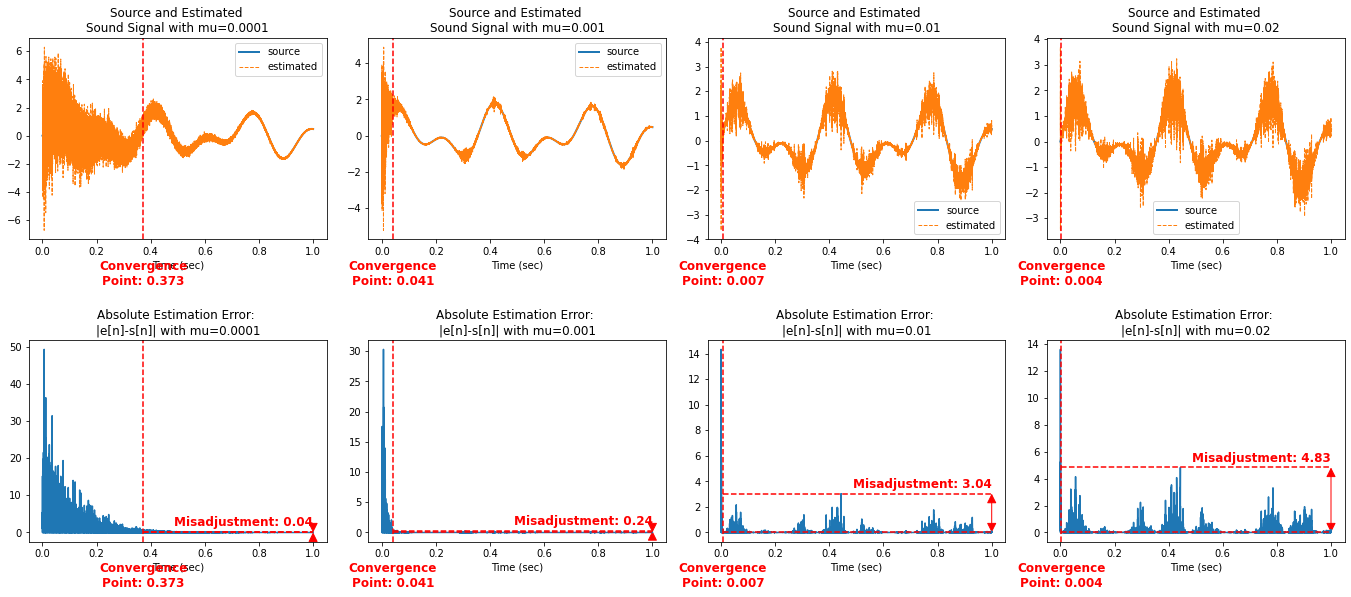

In [12]:
mus = [1e-4, 1e-3, 1e-2, 2e-2]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, mus=mus, conv_div=50, save=False, savedfname="../figures/StandardLMSvsmus")

Progress: 100%|█████████████████████████████████| 30/30 [00:41<00:00,  1.38s/it]


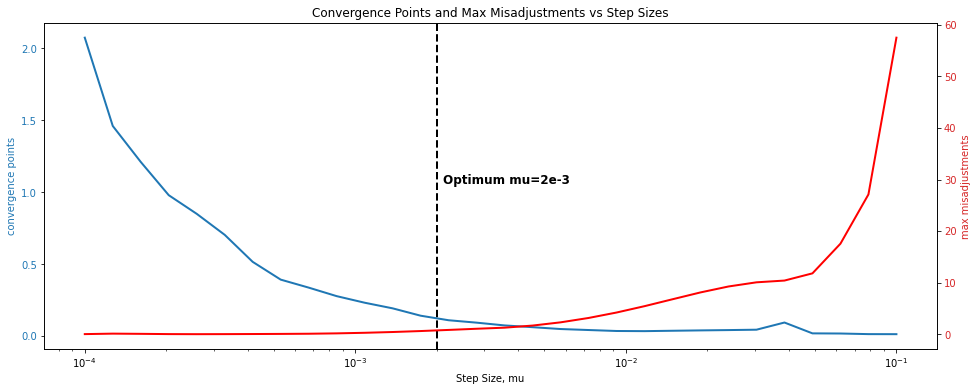

In [13]:
from helpers_miscellaneous import compare_with_params
mus = np.logspace(-4,-1,30)
T = 10
f = 3
fs = 8000
compare_with_params(f, T, fs, mus=mus, save=False, savedfname="../figures/ChoosingMu")

Progress: 100%|█████████████████████████████████| 45/45 [00:18<00:00,  2.46it/s]


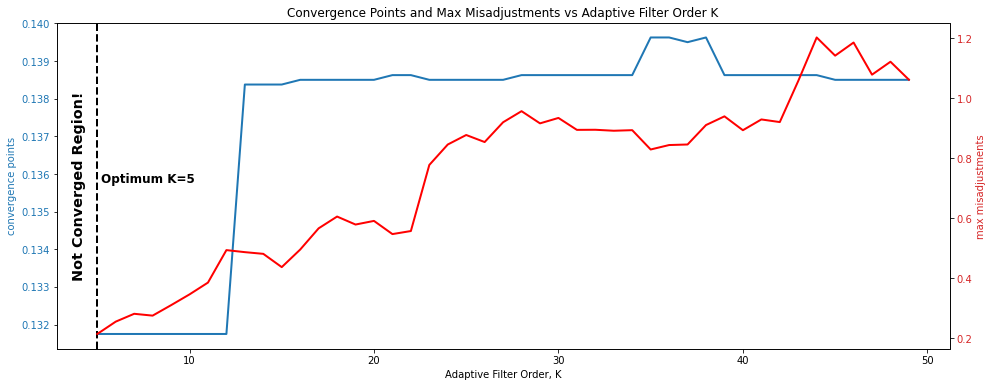

In [14]:
from helpers_miscellaneous import compare_with_params
Ks = np.arange(5,50,1)
T = 3
f = 3
fs = 8000
compare_with_params(f, T, fs, Ks=Ks, save=False, savedfname="../figures/ChoosingK")

### 2. Normalized LMS

Converged Point: 	 0.020476190476190478 sec
Max Misadjustment: 	 0.7681215955782015


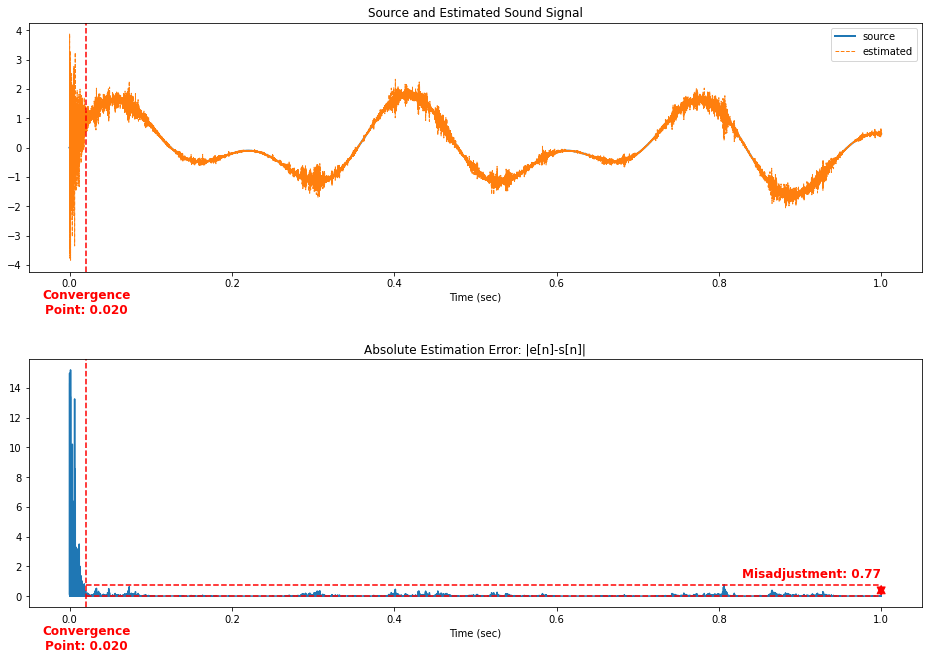

In [15]:
e = sb_lms(x, d, mu=0.012, K=5, normalized=True)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100, save=False, savedfname="../figures/NLMS")

Converged Point: 	 0.02290249433106576 sec
Converged Point: 	 0.017233560090702947 sec
Max Misadjustment: 	 0.775851819494876
Max Misadjustment: 	 0.5083996334262108


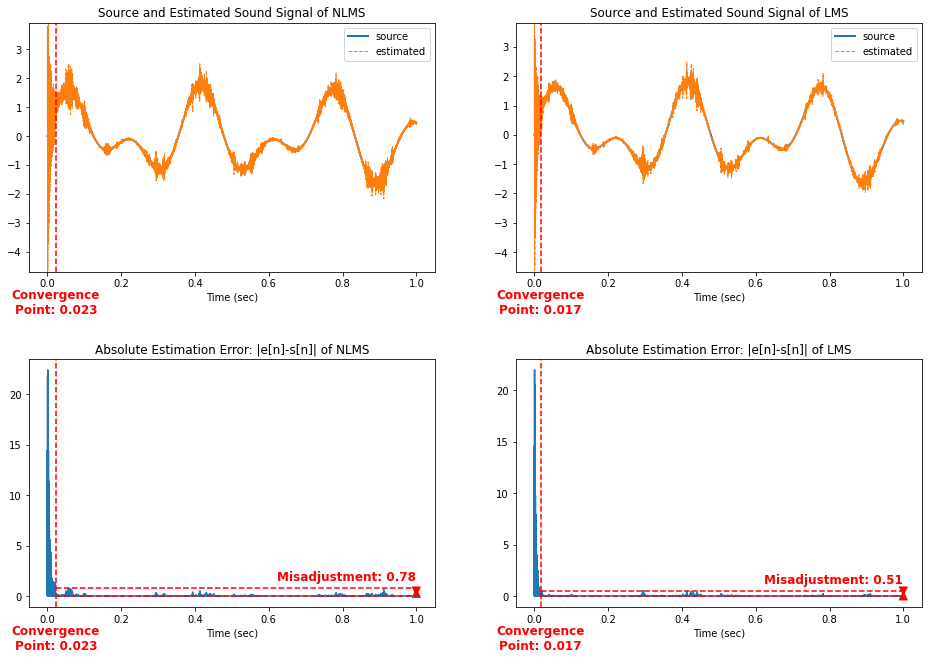

In [16]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_NLMS = sb_lms(x, d, mu=0.01, K=5, normalized=True)
e_LMS = sb_lms(x, d, mu=0.0025, K=5, normalized=False)
plot2methods(t, e_NLMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="NLMS", method_name2="LMS", save=False, savedfname="../figures/ComparisonNLMSvsLMS")

### 3. Sign LMS

Converged Point: 	 0.11643990929705215 sec
Max Misadjustment: 	 0.7666682245922753


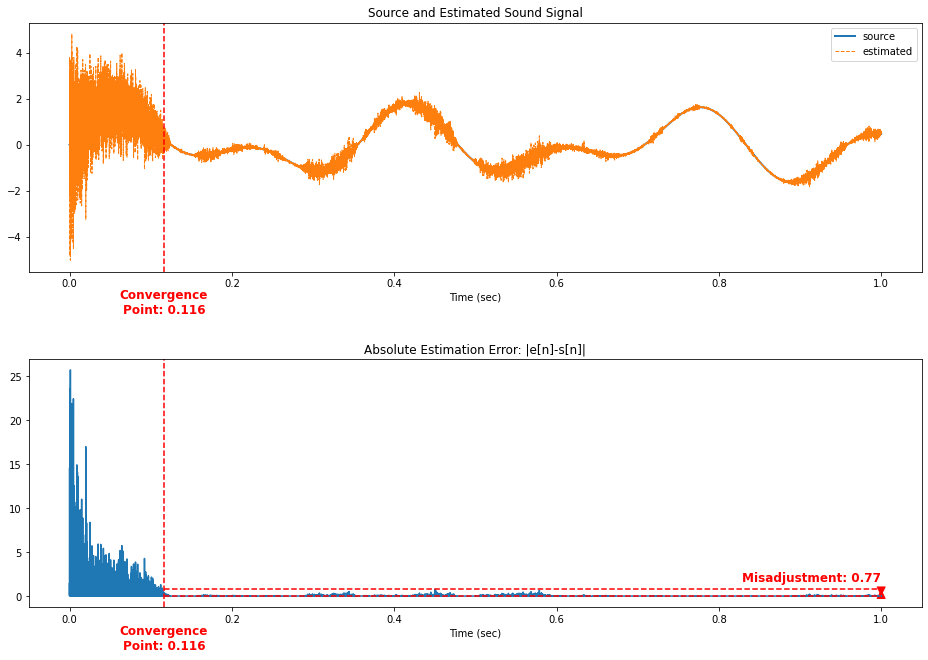

In [17]:
e = sb_lms(x, d, mu=0.001, K=5, type="sign-error")
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100, save=False, savedfname="../figures/SignerrorLMS")

Converged Point: 	 0.11140589569160998 sec
Converged Point: 	 0.023356009070294784 sec
Max Misadjustment: 	 0.6811677853943923
Max Misadjustment: 	 0.2514719976196554


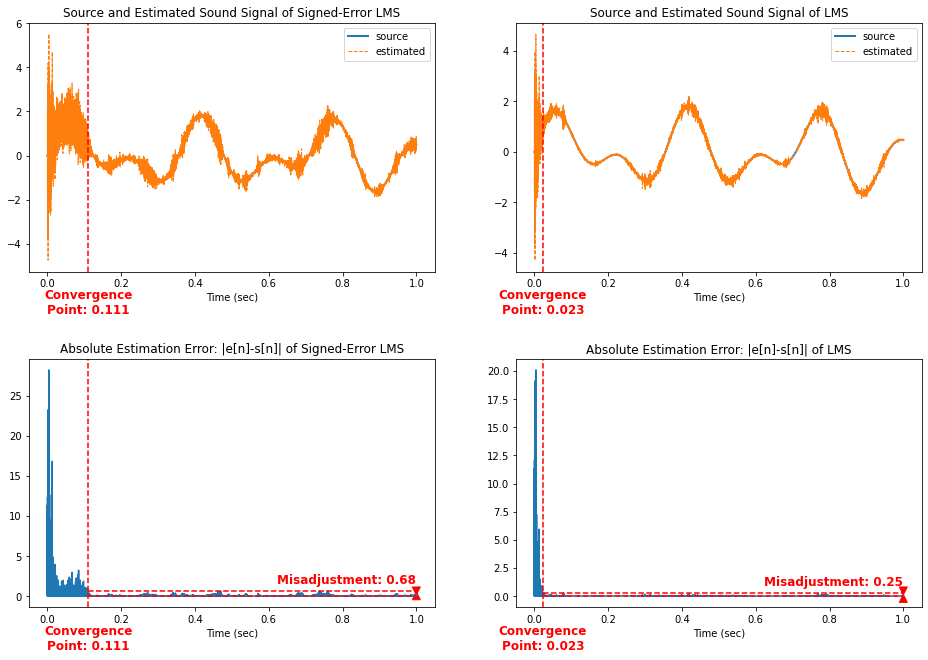

In [18]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_SELMS = sb_lms(x, d, mu=0.002, K=5, normalized=False, type="sign-error")
e_LMS = sb_lms(x, d, mu=0.002, K=5, normalized=False)
plot2methods(t, e_SELMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Signed-Error LMS", method_name2="LMS", save=False, savedfname="../figures/ComparisonSELMSvsLMS", ylim=False)

Converged Point: 	 0.05870748299319728 sec
Converged Point: 	 0.021882086167800453 sec
Max Misadjustment: 	 0.2487831607906437
Max Misadjustment: 	 0.5849403712921202


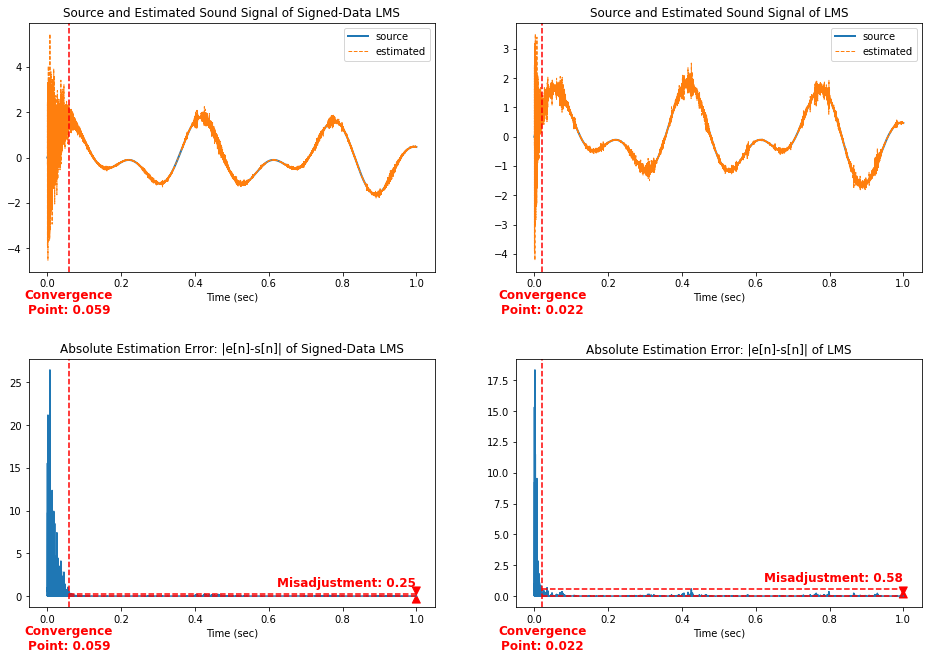

In [19]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_SDLMS = sb_lms(x, d, mu=0.001, K=5, normalized=False, type="sign-data")
e_LMS = sb_lms(x, d, mu=0.0025, K=5, normalized=False)
plot2methods(t, e_SDLMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Signed-Data LMS", method_name2="LMS", save=False, savedfname="../figures/ComparisonSDLMSvsLMS", ylim=False)

Converged Point: 	 0.11709750566893425 sec
Converged Point: 	 0.020136054421768707 sec
Max Misadjustment: 	 0.23534454548277603
Max Misadjustment: 	 0.5676260627980959


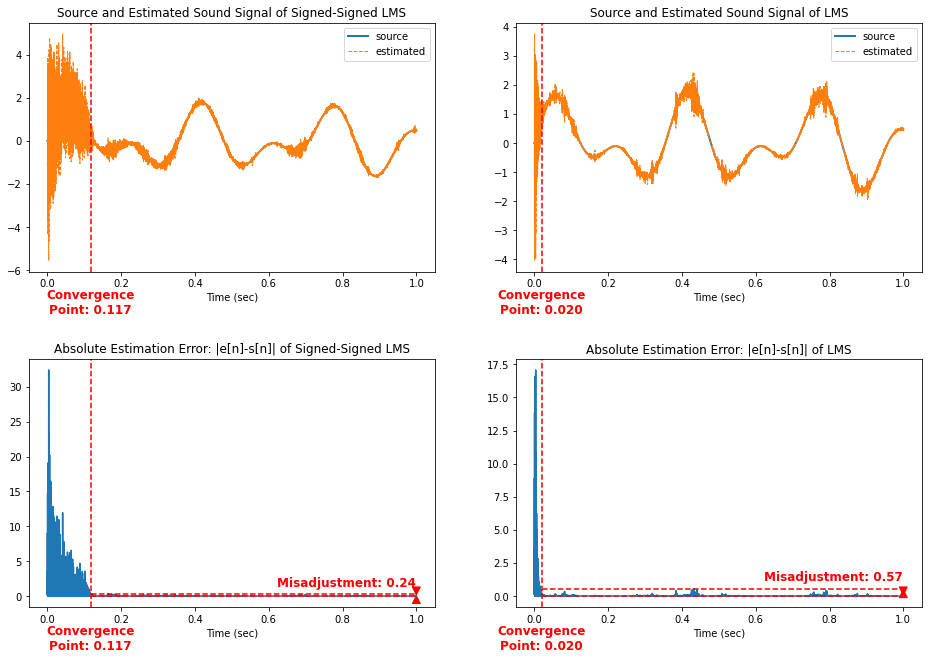

In [20]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_SSLMS = sb_lms(x, d, mu=0.001, K=5, normalized=False, type="sign-sign")
e_LMS = sb_lms(x, d, mu=0.0025, K=5, normalized=False)
plot2methods(t, e_SSLMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Signed-Signed LMS", method_name2="LMS", save=False, savedfname="../figures/ComparisonSSLMSvsLMS", ylim=False)

Converged Point: 	 0.15047619047619049 sec
Converged Point: 	 0.020861678004535148 sec
Max Misadjustment: 	 0.3011202739796779
Max Misadjustment: 	 0.6153726342759017


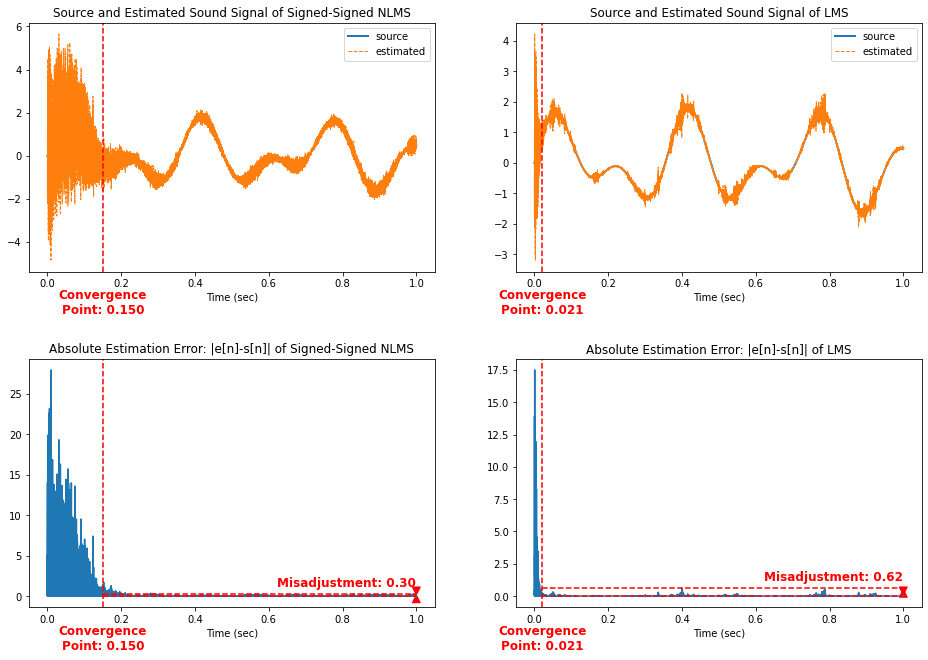

In [21]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_SSNLMS = sb_lms(x, d, mu=0.002, K=5, normalized=True, type="sign-sign")
e_LMS = sb_lms(x, d, mu=0.0025, K=5, normalized=False)
plot2methods(t, e_SSNLMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Signed-Signed NLMS", method_name2="LMS", save=False, savedfname="../figures/ComparisonSSNLMSvsLMS", ylim=False)

Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 80887.31it/s]


Converged Point: 	 0.021859410430839003 sec
Converged Point: 	 0.018095238095238095 sec
Max Misadjustment: 	 0.5496750915307426
Max Misadjustment: 	 0.6892557681718382


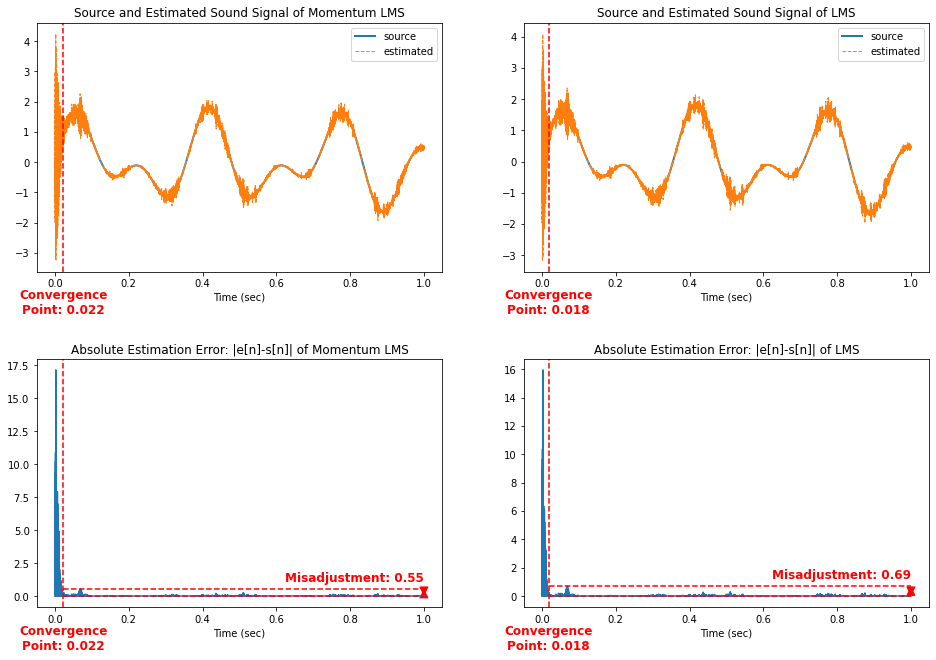

In [22]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_momentum = sb_lms(x, d, mu=0.002, K=5, type="momentum", beta=0.01)
e_LMS = sb_lms(x, d, mu=0.0025, K=5)
plot2methods(t, e_momentum, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Momentum LMS", method_name2="LMS", save=False, savedfname="../figures/MomentumLMSvsLMS", ylim=False)


Converged Point: 	 0.03147392290249433 sec
Converged Point: 	 0.021020408163265305 sec
Max Misadjustment: 	 1.9790318893949996
Max Misadjustment: 	 0.6755215059327839


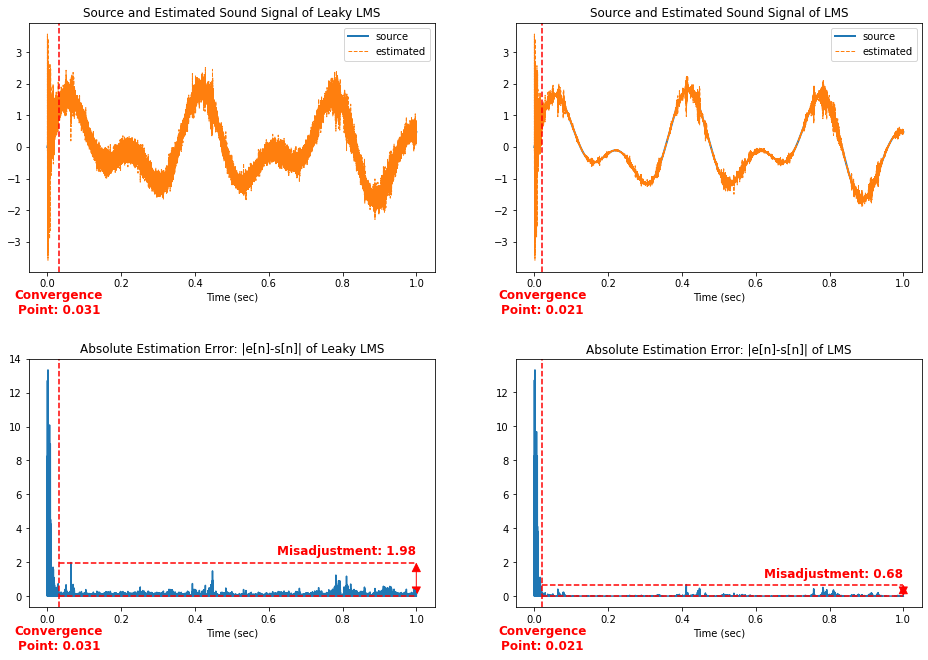

In [23]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_LLMS = sb_lms(x, d, mu=0.0025, K=5, a=0.1)
e_LMS = sb_lms(x, d, mu=0.0025, K=5)
plot2methods(t, e_LLMS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="Leaky LMS", method_name2="LMS", save=False, savedfname="../figures/ComparisonLLMSvsLMS", ylim=False)


Converged Point: 	 0.002403628117913832 sec
Converged Point: 	 0.019523809523809523 sec
Max Misadjustment: 	 0.0773530269819883
Max Misadjustment: 	 0.6192005075633243


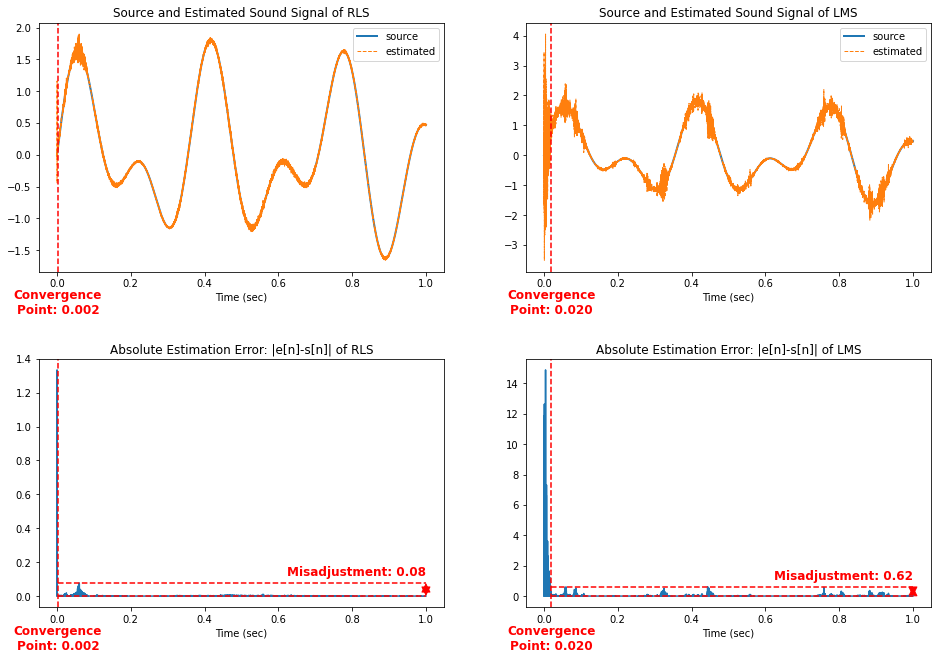

In [24]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, sigma_x=1, plot=False, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]))
e_RLS = rls(x, d, mu=1., eps=0.001, K=5)
e_LMS = sb_lms(x, d, mu=0.0025, K=5)
plot2methods(t, e_RLS, e_LMS, s, fs=44100, T=1, conv_div=50, bufsize=100, method_name1="RLS", method_name2="LMS", save=False, savedfname="../figures/ComparisonRLSvsLMS", ylim=False)

Converged Point: 	 0.11628117913832199 sec
Max Misadjustment: 	 0.19980366198679667
Converged Point: 	 0.022879818594104307 sec
Max Misadjustment: 	 4.002085856979928


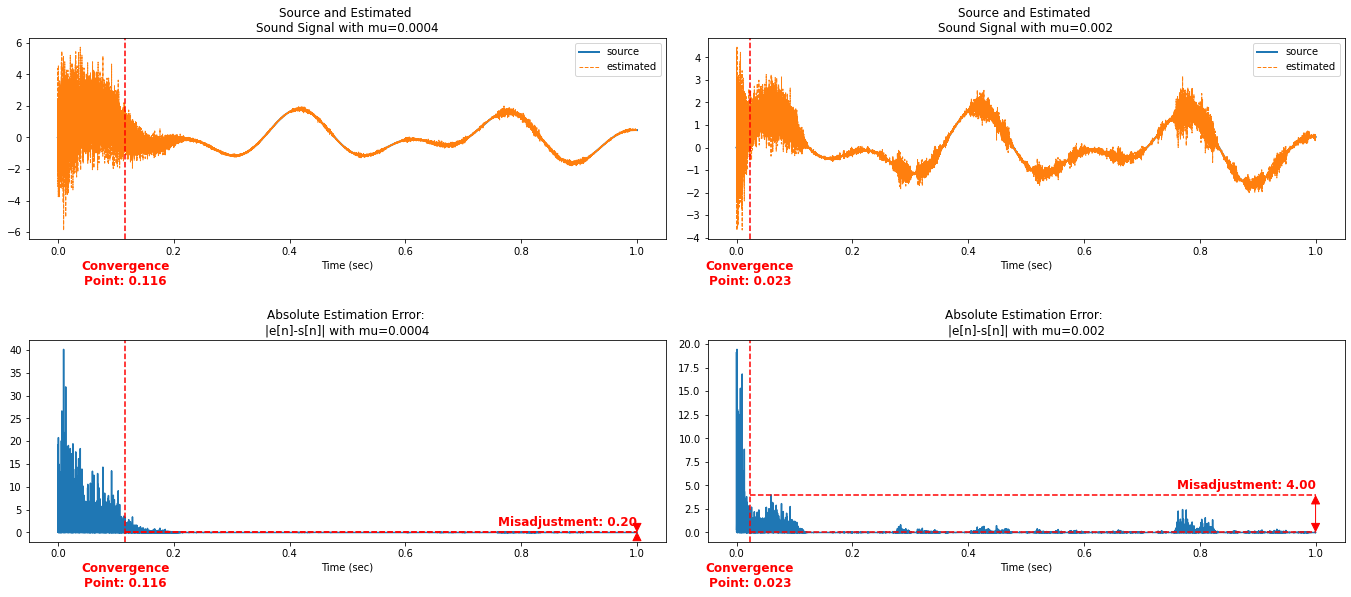

In [25]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]),plot=False)
mus=[0.0004, 0.002]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, lms_type="sign-error", mus=mus, conv_div=10)

Converged Point: 	 0.043741496598639455 sec
Max Misadjustment: 	 0.24074969993976547
Converged Point: 	 0.019773242630385487 sec
Max Misadjustment: 	 0.5387798233329998


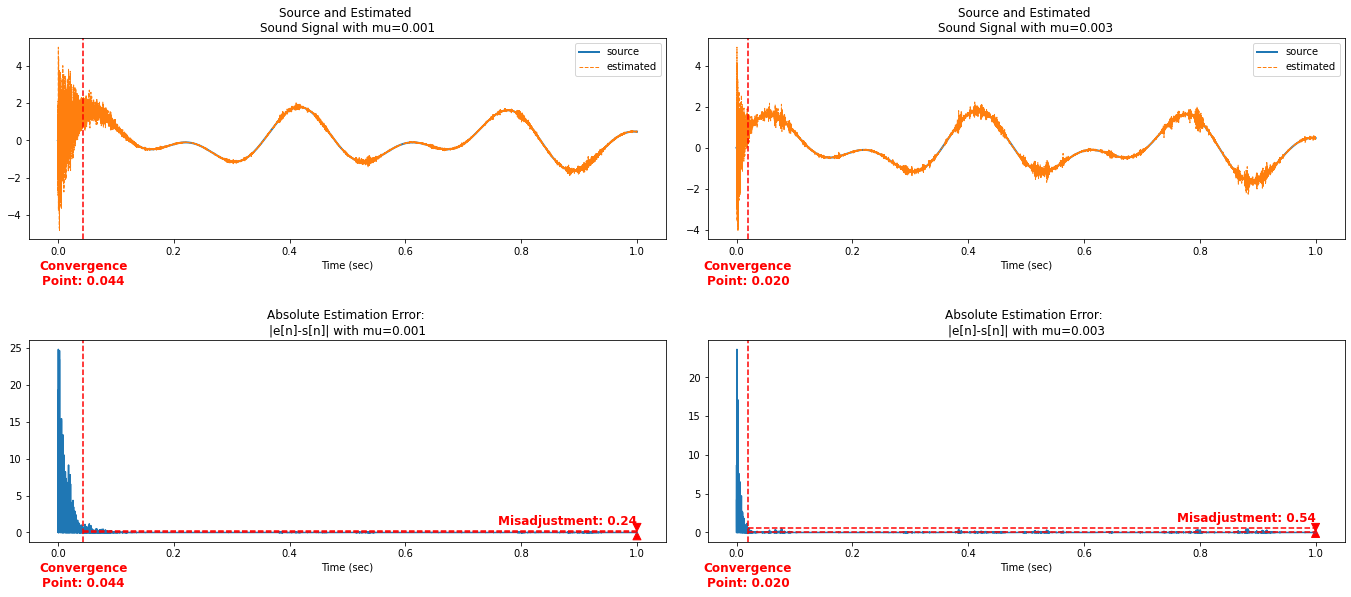

In [26]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]),plot=False)
mus=[0.001, 0.003]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, lms_type="sign-data", mus=mus, conv_div=30)

Converged Point: 	 0.15700680272108844 sec
Max Misadjustment: 	 0.09653567794047482
Converged Point: 	 0.10854875283446712 sec
Max Misadjustment: 	 0.6248344009759516


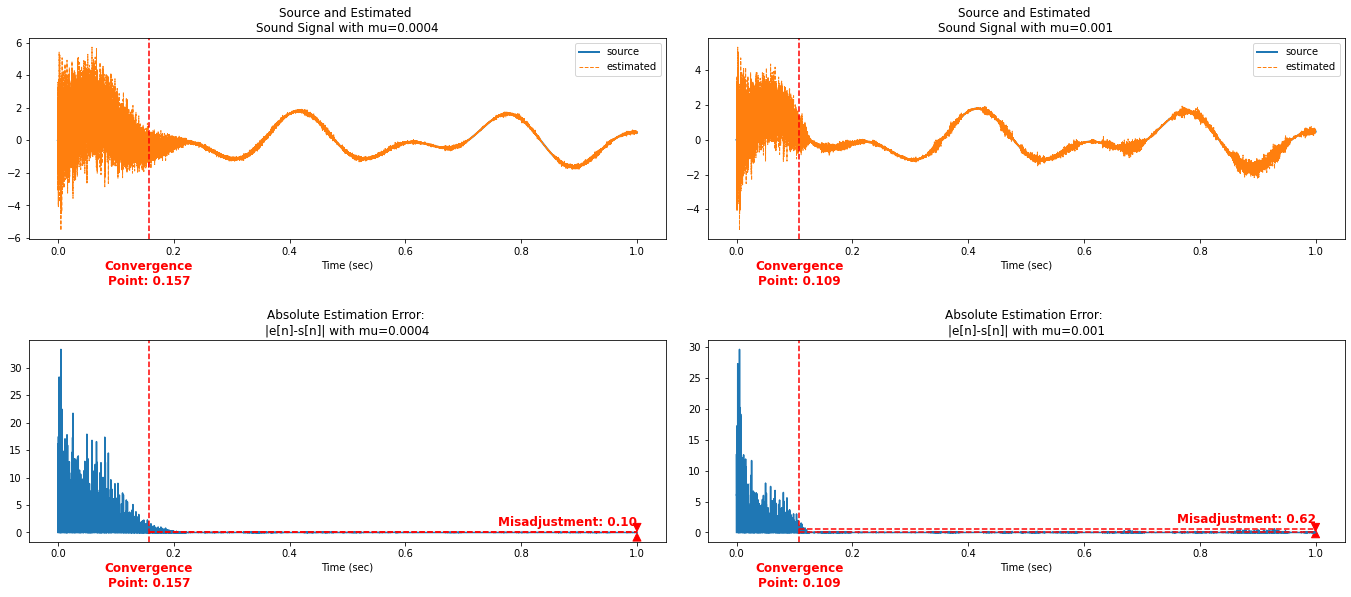

In [27]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]),plot=False)
mus=[0.0004, 0.001]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, lms_type="sign-sign", mus=mus, conv_div=20)

### 4. Leaky LMS

Not Converged!
Not Converged!


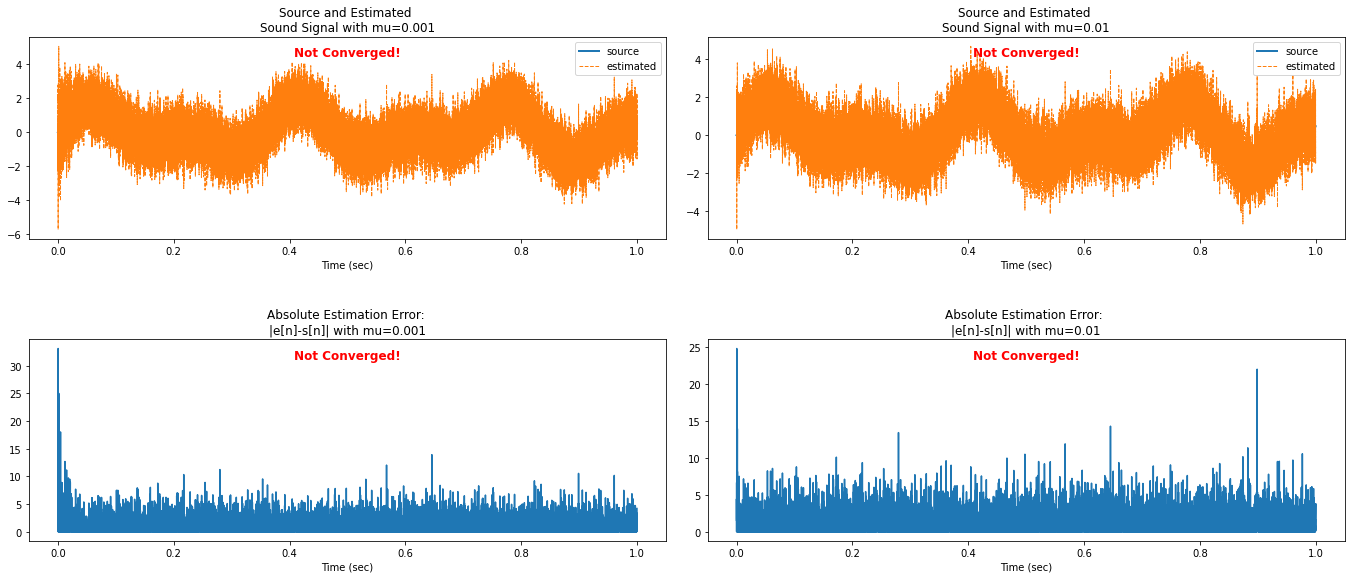

In [28]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]),plot=False)
mus=[1e-3, 0.01]
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, a=0.9, lms_type="standard", mus=mus, conv_div=20)

Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 81719.06it/s]


Converged Point: 	 0.016077097505668936 sec
Max Misadjustment: 	 0.3894884930772177


Progress: 100%|████████████████████████| 44100/44100 [00:00<00:00, 82302.66it/s]


Converged Point: 	 0.0033786848072562357 sec
Max Misadjustment: 	 2.7171516980402552


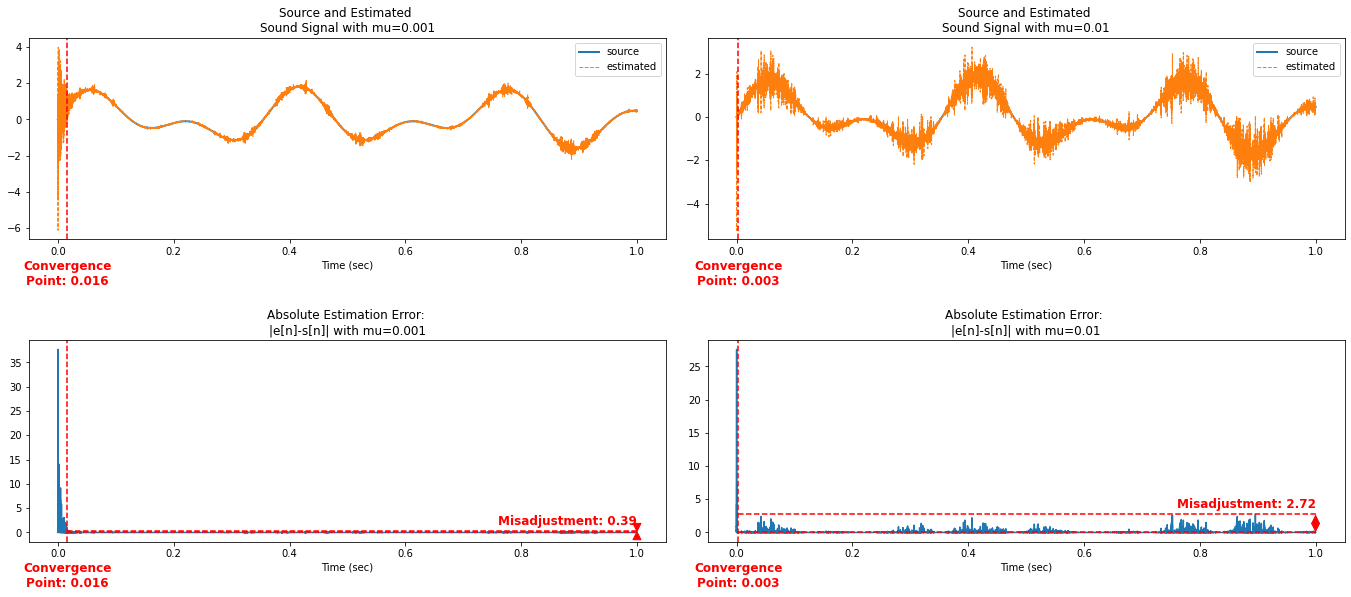

44100

In [37]:
t, s, x, d = generate_signals(f=3, T=1, fs=44100, h=np.array([-0.86101471, 0.39594833, -1.04287894, -1.00737516, -0.331485]),plot=False)
mus=[1e-3, 0.01]
beta = 0.5
denoising_plots_across_params(t, s, x, d, fs=44100, T=1, a=0.9, lms_type="momentum", beta=beta, mus=mus, conv_div=20)

### 5. RLS

Converged Point: 	 0.12433106575963719 sec
Max Misadjustment: 	 0.01629870621919325


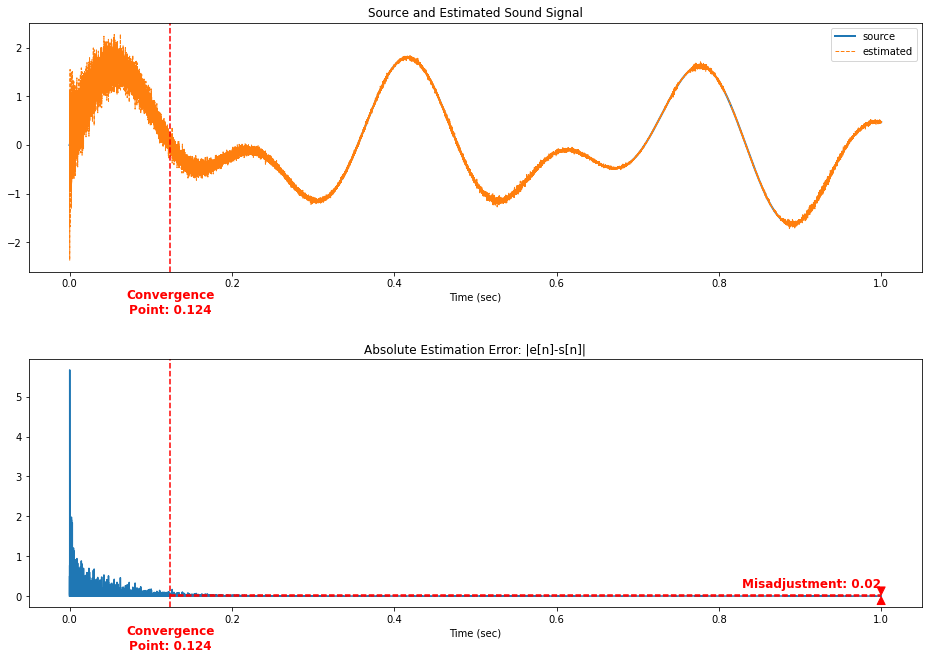

In [47]:
e = rls2(x, d, lbda=.999, delta=.00001, K=5)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100)

Converged Point: 	 0.03303854875283447 sec
Max Misadjustment: 	 0.145549043357827


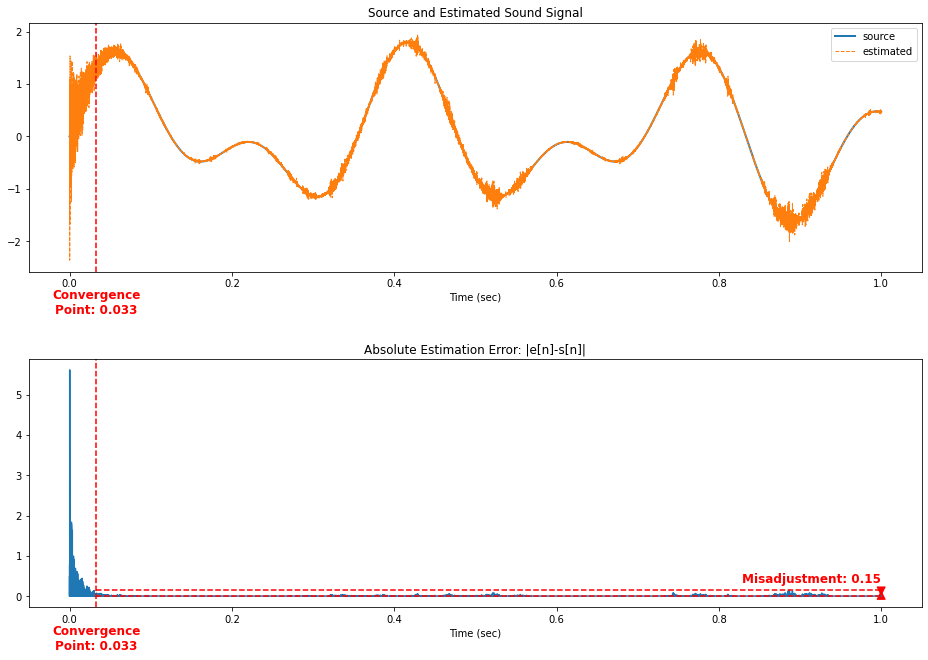

In [48]:
e = rls2(x, d, lbda=.995, delta=.00001, K=5)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100)

Converged Point: 	 0.12433106575963719 sec
Max Misadjustment: 	 0.01629870621919325


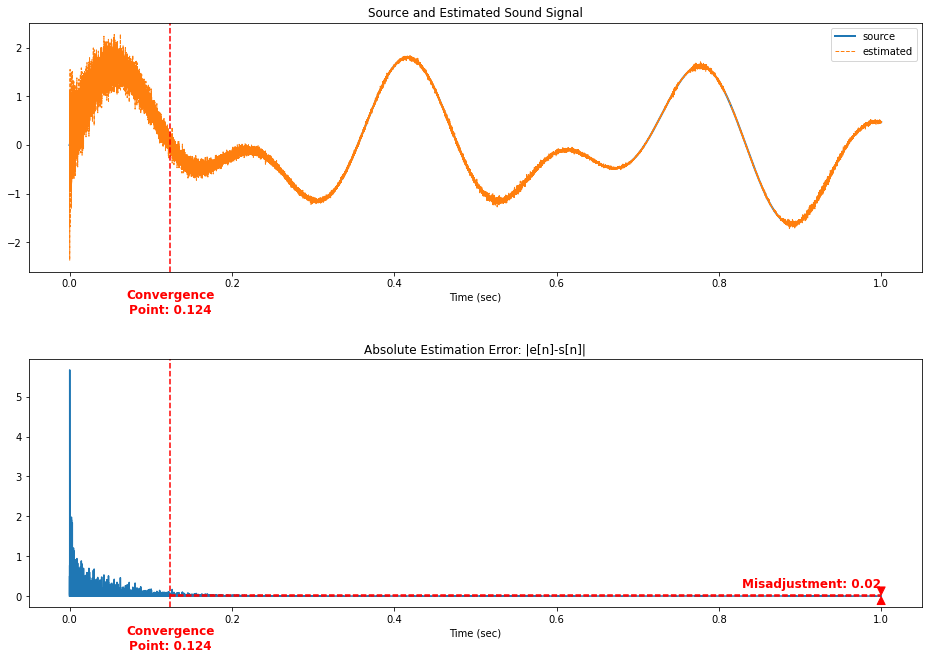

In [66]:
e = rls(x, d, mu=.999, eps=.00001, K=5)
denoising_plots(t, e, s, fs=44100, T=1, conv_div=50, bufsize=100)

## Real Data

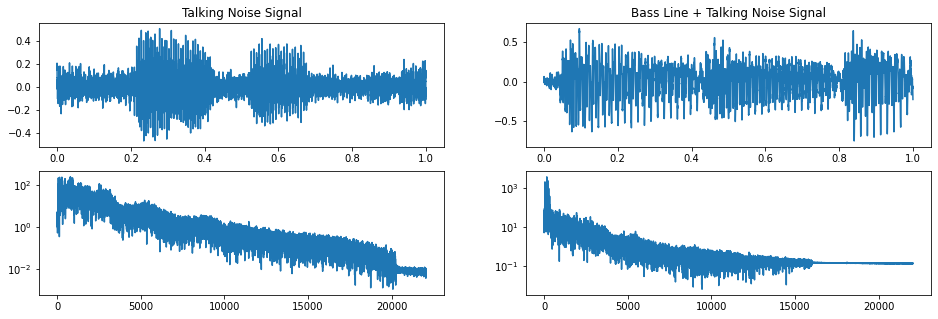

In [31]:
x, fs = sf.read("../data/talkingNoise.wav", dtype = 'float32')
x = x[:,0]
d, fs = sf.read("../data/bassLineTalkingNoise.wav", dtype = 'float32')
d = d[:,0]

T_clip = 1

t1 = np.arange(len(x))/fs
t2 = np.arange(len(d))/fs
fig, axes = plt.subplots(2,2, figsize=(16,5))
axes[0,0].plot(t1[0*fs:int(T_clip*fs)], x[0*fs:int(T_clip*fs)])
axes[0,0].set_title("Talking Noise Signal")
axes[0,1].plot(t2[0*fs:int(T_clip*fs)], d[0*fs:int(T_clip*fs)])
axes[0,1].set_title("Bass Line + Talking Noise Signal")
X = np.abs(np.fft.fft(x[0*fs:int(T_clip*fs)]))
D = np.abs(np.fft.fft(d[0*fs:int(T_clip*fs)]))
axes[1,0].plot(X[0:int(len(X)/2)])
axes[1,1].plot(D[0:int(len(X)/2)])
axes[1,0].set_yscale('log')
axes[1,1].set_yscale('log')
plt.show()
aud1 = ipd.Audio(x[0*fs:int(T_clip*fs)], rate=fs)
aud2 = ipd.Audio(d[0*fs:int(T_clip*fs)], rate=fs)
ipd.display(aud1, aud2)